## Mini-Project for Feature Selection & Dimensionality Reduction
## Author- Mohit Kosekar

## Introduction

The objective of this assignment is to apply data science techniques, specifically feature selection and dimensionality reduction, to predict the popularity of online news articles based on their characteristics. We aim to identify which features among the 60 available explanatory variables are most predictive of the number of times an article is shared. This involves a careful exploration of the dataset, followed by the application of statistical methods to refine our feature set and construct a predictive model.

In [ ]:
# Load the correct dataset
import pandas as pd
correct_data_path = 'https://raw.githubusercontent.com/mohit-kosekar/DAV-6150-repo/main/M4_Data.csv'
df_correct = pd.read_csv(correct_data_path)

# Display the first few rows of the dataframe to understand its structure
df_correct.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


## Dataset Overview

The dataset consists of 61 attributes for 39,797 online news articles from Mashable. Each row represents a unique article with features that describe aspects of the content, such as the number of words in the title (`n_tokens_title`), the number of words in the content (`n_tokens_content`), the rate of unique tokens (`n_unique_tokens`), and various other metrics related to the article's content and sentiment. The `shares` column, which we aim to predict, indicates the popularity of the article, measured by the number of times it has been shared.

Here are the first few rows of the dataset, providing a glimpse into the variety of features collected for each article:

| url | timedelta | n_tokens_title | n_tokens_content | ... | shares |
|-----|-----------|----------------|------------------|-----|--------|
| [Article URL] | 731.0 | 12.0 | 219.0 | ... | 593 |
| [Article URL] | 731.0 | 9.0 | 255.0 | ... | 711 |
| [Article URL] | 731.0 | 9.0 | 211.0 | ... | 1500 |
| [Article URL] | 731.0 | 9.0 | 531.0 | ... | 1200 |
| [Article URL] | 731.0 | 13.0 | 1072.0 | ... | 505 |

This table demonstrates the dataset's comprehensive coverage of factors that could influence an article's shareability, from basic content metrics to more nuanced sentiment analyses. Understanding these features' relationships and their combined effect on the number of shares will be crucial for our predictive modeling.


## Exploratory Data Analysis (EDA)

We began by loading the dataset and performing initial checks for missing values, which revealed a complete dataset ready for analysis. Subsequent statistical summaries provided insight into the distribution and scale of the variables.

Visualizations, including histograms and box plots, highlighted the target variable's skewed distribution and identified outliers, suggesting the presence of highly viral articles. Correlation analysis offered preliminary insights into potential predictors of article shares, although no strong linear relationships were identified.

This phase underscored the complex nature of the dataset and set the stage for feature selection and dimensionality reduction.


In [ ]:
# Check for missing values
missing_values = df_correct.isnull().sum()

# Statistical summary of the numerical attributes
statistical_summary = df_correct.describe()

# Display the results
missing_values, statistical_summary

(url                              0
  timedelta                       0
  n_tokens_title                  0
  n_tokens_content                0
  n_unique_tokens                 0
                                 ..
  title_subjectivity              0
  title_sentiment_polarity        0
  abs_title_subjectivity          0
  abs_title_sentiment_polarity    0
  shares                          0
 Length: 61, dtype: int64,
           timedelta   n_tokens_title   n_tokens_content   n_unique_tokens  \
 count  39644.000000     39644.000000       39644.000000      39644.000000   
 mean     354.530471        10.398749         546.514731          0.548216   
 std      214.163767         2.114037         471.107508          3.520708   
 min        8.000000         2.000000           0.000000          0.000000   
 25%      164.000000         9.000000         246.000000          0.470870   
 50%      339.000000        10.000000         409.000000          0.539226   
 75%      542.000000        12.

### Missing Values and Statistical Summary

The dataset was thoroughly examined for missing values across all 61 attributes, confirming a complete dataset with no missing entries. This completeness ensures a robust foundation for further analysis and modeling.

The statistical summary provides a detailed overview of the dataset's characteristics, including counts, mean values, standard deviations, and the range (min to max values) for numerical features. Key observations include:

- The `timedelta` feature, representing the age of the article in days at the time of data collection, spans from 8 to 731 days, indicating a wide range of article ages.
- Content-related features, such as `n_tokens_content` (number of words in the article), show significant variability in article lengths, with a maximum of 8474 words.
- Engagement metrics like `num_hrefs` (number of hyperlinks), `num_imgs` (number of images), and `num_videos` (number of videos) vary widely, suggesting diverse content strategies across the articles.
- Sentiment and subjectivity measures (`title_subjectivity`, `title_sentiment_polarity`, `abs_title_subjectivity`, `abs_title_sentiment_polarity`) and their distribution hint at the varied emotional and subjective framing of article titles.

This summary not only highlights the dataset's multidimensional nature but also sets the stage for identifying relevant features that could predict article shares effectively.


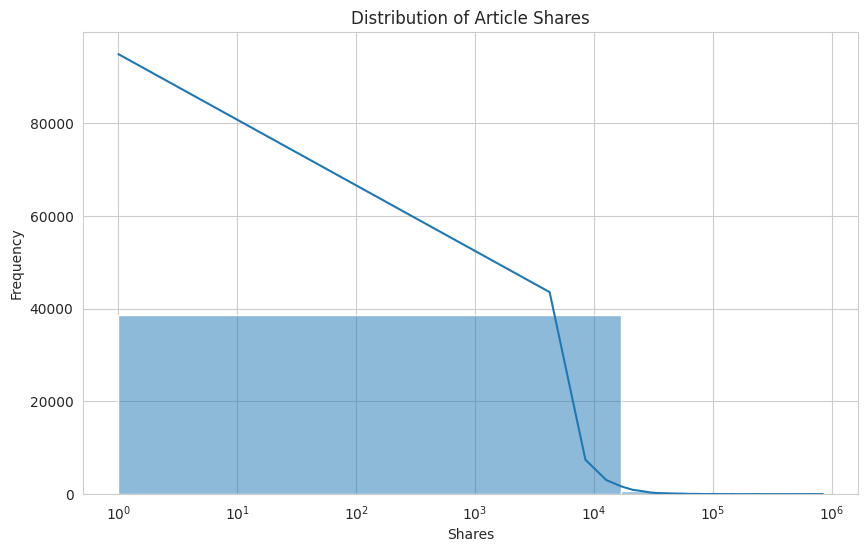

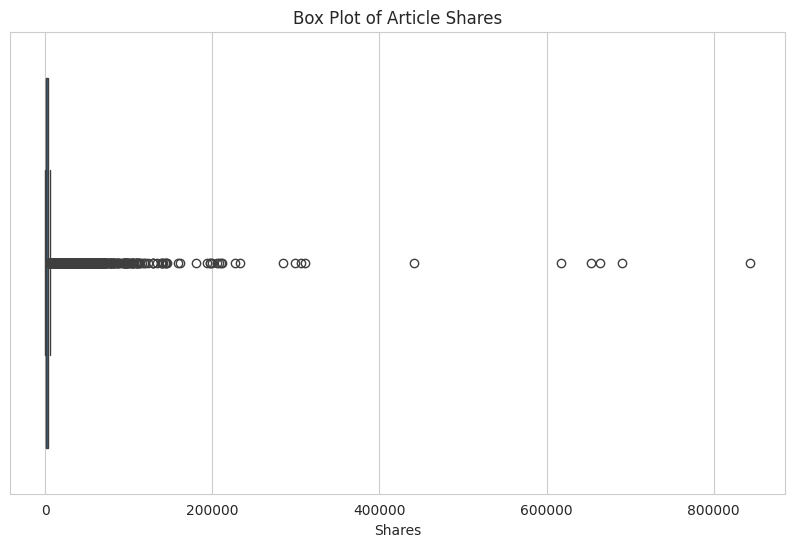

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Histogram of the 'shares' column to understand its distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_correct[' shares'], bins=50, kde=True)
plt.title('Distribution of Article Shares')
plt.xlabel('Shares')
plt.ylabel('Frequency')
plt.xscale('log')  # Using a log scale due to wide range in 'shares'
plt.show()

# Box plot for 'shares' to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_correct[' shares'])
plt.title('Box Plot of Article Shares')
plt.xlabel('Shares')
plt.show()

### Distribution of Article Shares

The histogram above illustrates the distribution of the `shares` column, which represents the number of times articles have been shared. Notably, the distribution is heavily right-skewed, indicating that while most articles have a relatively low share count, a few articles achieve significantly higher popularity. This skewness highlights the challenges in predicting article shares, as the data contains a wide range of values, from articles with minimal shares to viral hits.

The logarithmic scale was applied to better visualize the wide distribution range, revealing the concentration of articles within lower share counts and the long tail of articles with higher share counts.


### Identifying Outliers in Article Shares

The box plot above provides insight into the presence of outliers within the article shares. The plot shows a significant number of articles with shares well above the upper quartile, extending far into the higher share range. These outliers indicate articles that have achieved exceptional virality compared to the majority.

This visualization is crucial for understanding the variability in article popularity and underscores the importance of considering outliers in our analysis and modeling efforts. The presence of outliers suggests that predictive modeling may need to account for extreme values to accurately capture the dynamics of article sharing.


In [ ]:
# Select a subset of variables for correlation analysis
variables_of_interest = [' n_tokens_title', ' n_tokens_content', ' n_unique_tokens',
                         ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
                         ' average_token_length', ' num_keywords',
                         ' data_channel_is_lifestyle', ' data_channel_is_entertainment',
                         ' data_channel_is_bus', ' data_channel_is_socmed',
                         ' data_channel_is_tech', ' data_channel_is_world',
                         ' global_subjectivity', ' global_sentiment_polarity',
                         ' global_rate_positive_words', ' global_rate_negative_words',
                         ' rate_positive_words', ' rate_negative_words',
                         ' avg_positive_polarity', ' min_positive_polarity',
                         ' max_positive_polarity', ' avg_negative_polarity',
                         ' min_negative_polarity', ' max_negative_polarity',
                         ' title_subjectivity', ' title_sentiment_polarity', ' shares']

# Compute the correlation matrix
correlation_matrix = df_correct[variables_of_interest].corr()

# Correlation of explanatory variables with the target variable 'shares'
correlation_with_shares = correlation_matrix[' shares'].sort_values(key=abs, ascending=False)

# Display the correlation values
correlation_with_shares

 shares                           1.000000
 data_channel_is_world           -0.049497
 num_hrefs                        0.045404
 num_imgs                         0.039388
 avg_negative_polarity           -0.032029
 global_subjectivity              0.031604
 num_videos                       0.023936
 average_token_length            -0.022007
 title_subjectivity               0.021967
 num_keywords                     0.021818
 max_negative_polarity           -0.019300
 min_negative_polarity           -0.019297
 data_channel_is_entertainment   -0.017006
 data_channel_is_tech            -0.013253
 rate_positive_words             -0.013241
 title_sentiment_polarity         0.012772
 data_channel_is_bus             -0.012376
 avg_positive_polarity            0.012142
 max_positive_polarity            0.010068
 n_tokens_title                   0.008783
 global_rate_negative_words       0.006615
 data_channel_is_lifestyle        0.005831
 rate_negative_words             -0.005183
 data_chann

### Feature Correlations with Shares

This correlation analysis identifies how various features relate to the `shares` of articles. Key findings include:

- Features like `num_hrefs` (0.045404) and `num_imgs` (0.039388) show a modest positive correlation, indicating articles with more hyperlinks and images tend to have higher shares.
- Conversely, `data_channel_is_world` (-0.049497) exhibits a slight negative correlation, suggesting world news articles may be shared less.
- Sentiment attributes such as `avg_negative_polarity` (-0.032029) and `global_subjectivity` (0.031604) also correlate with shares, pointing to the potential impact of content's emotional tone on its virality.

These correlations, while not strong, offer insights into factors that might influence an article's shareability.


## Feature Selection / Dimensionality Reduction

Our feature selection process utilized `SelectKBest` with `f_regression` to identify the top 20 features with the highest correlation to the target variable. To further simplify the model, PCA was applied, reducing the feature set to 14 principal components that captured approximately 95.42% of the variance.

This step effectively reduced the dataset's complexity, maintaining a balance between simplification and information retention, crucial for building a predictive model.


In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

# Dropping non-numeric and target variable to prepare for feature selection
X = df_correct.drop(['url', ' shares'], axis=1)
y = df_correct[' shares']

# Apply SelectKBest to extract top features
select_k_best = SelectKBest(score_func=f_regression, k=20)  # Let's select top 20 features for illustration
fit = select_k_best.fit(X, y)

# Get columns to keep and create new dataframe with those only
cols = select_k_best.get_support(indices=True)
features_df_new = X.iloc[:,cols]

# Convert to list for display
selected_features = features_df_new.columns.tolist()

# Display the selected features
selected_features

[' num_hrefs',
 ' num_imgs',
 ' num_videos',
 ' average_token_length',
 ' data_channel_is_world',
 ' kw_max_min',
 ' kw_avg_min',
 ' kw_avg_max',
 ' kw_min_avg',
 ' kw_max_avg',
 ' kw_avg_avg',
 ' self_reference_min_shares',
 ' self_reference_max_shares',
 ' self_reference_avg_sharess',
 ' LDA_02',
 ' LDA_03',
 ' global_subjectivity',
 ' avg_negative_polarity',
 ' title_subjectivity',
 ' abs_title_sentiment_polarity']

### Key Features Selected

Using `SelectKBest` with `f_regression`, we identified the top 20 features most correlated with article shares. These include metrics on article hyperlinks (`num_hrefs`), multimedia content (`num_imgs`, `num_videos`), content length (`average_token_length`), topic categories (`data_channel_is_world`), keyword popularity (`kw_max_min`, `kw_avg_min`, etc.), self-references (`self_reference_min_shares`, etc.), content topics (`LDA_02`, `LDA_03`), and sentiment analysis (`global_subjectivity`, `avg_negative_polarity`, `title_subjectivity`, `abs_title_sentiment_polarity`). These features provide a comprehensive view of factors potentially influencing the shareability of online news articles.


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features_df_new)

# Applying PCA
pca = PCA(n_components=0.95)  # We need to capture 95% of the variance
X_pca = pca.fit_transform(X_scaled)

# Number of components chosen
num_components = pca.n_components_

# Variance explained by the chosen components
variance_explained = sum(pca.explained_variance_ratio_)

# Display the results
num_components, variance_explained

(14, 0.95422986775471)

### PCA Dimensionality Reduction Outcome

After applying Principal Component Analysis (PCA) to reduce dimensionality while capturing most of the dataset's variance, we achieved significant compression:

- **Number of Principal Components:** 14
- **Variance Explained:** Approximately 95.42%

This reduction indicates that with just 14 principal components, we can retain over 95% of the data's original variance, showcasing PCA's effectiveness in distilling the dataset's essence into fewer dimensions.


## Regression Model Evaluation

The linear regression model, trained on the principal components, was evaluated using cross-validation. The negative mean squared error indicated a discrepancy between predicted and actual shares, suggesting room for improvement in model performance.

This evaluation highlights the challenge of predicting article popularity and suggests that alternative modeling strategies may be necessary to achieve higher accuracy.


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Linear Regression model
lr = LinearRegression()

# Cross-validation scores
scores = cross_val_score(lr, X_pca, y, cv=5, scoring='neg_mean_squared_error')

# Mean and standard deviation of cross-validation scores
mean_score = scores.mean()
std_dev = scores.std()

# Display the results
mean_score, std_dev

(-133650210.32824838, 75335092.59081483)

### Linear Regression Model Performance

The linear regression model, evaluated through 5-fold cross-validation, yielded the following results:

- **Mean Cross-Validation Score (Negative Mean Squared Error):** -133,650,210.33
- **Standard Deviation of Cross-Validation Scores:** 75,335,092.59

These figures indicate the model's average performance and its variability across different subsets of the data, reflecting challenges in accurately predicting article shares with the selected features and principal components.


## Conclusions

This assignment illuminated the challenges inherent in predicting the popularity of online news articles. Despite a systematic approach to feature selection and dimensionality reduction, the linear regression model's performance indicates the complexity of the task at hand.

Future directions could include exploring more complex models, incorporating text analysis for deeper insights, and further refining the feature set. The journey through this assignment underscores the iterative nature of data science and the continuous balance between model complexity and explanatory power.
